In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sts
from sqlalchemy import create_engine
from config import db_user
from config import db_password


In [19]:
db_name = "EmployeeSQL"
db_connect = "postgresql://" + db_user + ":" + db_password + "@localhost:5432/" + db_name
engine = create_engine(db_connect)
connection = engine.connect()

In [20]:
result = engine.execute("select dept_name from departments")

for row in result:
    print("dept_name:", row['dept_name'])

dept_name: Marketing
dept_name: Finance
dept_name: Human Resources
dept_name: Production
dept_name: Development
dept_name: Quality Management
dept_name: Sales
dept_name: Research
dept_name: Customer Service


The mean salary is 52970.732451403885
The median salary is 48681.0


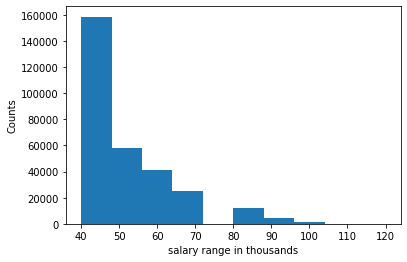

NormaltestResult(statistic=8.097324867680134, pvalue=0.017445693810227137)


In [23]:
# Create a histogram to visualize the most common salary ranges for employees.
salaries_df = pd.read_sql_query('select * from salaries',con=engine)

salaries_df.sort_values('salary')

bins = [40000, 50000, 60000, 70000, 80000, 90000, 100000, 110000, 120000, 130000]

group_names = [40, 50, 60, 70, 80, 90, 100, 110, 120]
               
salaries_df["range"] = pd.cut(salaries_df["salary"], bins, labels=group_names, include_lowest=True)
salaries_df

mean_numpy = np.mean(salaries_df["salary"])
print(f"The mean salary is {mean_numpy}")

median_numpy = np.median(salaries_df["salary"])
print(f"The median salary is {median_numpy}")

plt.hist(salaries_df["range"])
plt.xlabel('salary range in thousands')
plt.ylabel('Counts')
plt.show()
print(sts.normaltest(salaries_df["range"].sample(50)))

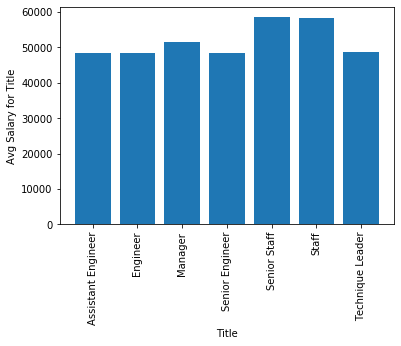

<Figure size 432x288 with 0 Axes>

In [29]:
# Create a bar chart of average salary by title.

title_salaries_df = pd.read_sql_query('select t.title, avg(s.salary) AS avg_salary from employees as e inner join titles as t on e.emp_title_id = t.title_id inner join salaries as s on e.emp_no = s.emp_no group by t.title',con=engine)

#plt.bar(title_salaries_df.title, title_salaries_df.avg_salary, color='r')

# Set x axis and tick locations
x_axis = np.arange(len(title_salaries_df.title))
tick_locations = [value for value in x_axis]    

plt.bar(x_axis, title_salaries_df.avg_salary)
plt.xticks(tick_locations, title_salaries_df.title, rotation="vertical")
plt.ylabel("Avg Salary for Title")
plt.xlabel("Title")
plt.show()
plt.tight_layout()